<a href="https://colab.research.google.com/github/Shravani-std/Kaggle_Competations_problems/blob/main/Predicting_Loan_Payback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/train.csv')
dataset.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [2]:
train_df = pd.read_csv('/content/train.csv', index_col=0)
test_df = pd.read_csv('/content/test.csv',index_col=0)

In [5]:
train_df.shape

(593994, 12)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254569 entries, 593994 to 848562
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         254569 non-null  float64
 1   debt_to_income_ratio  254569 non-null  float64
 2   credit_score          254569 non-null  int64  
 3   loan_amount           254569 non-null  float64
 4   interest_rate         254569 non-null  float64
 5   gender                254569 non-null  object 
 6   marital_status        254569 non-null  object 
 7   education_level       254569 non-null  object 
 8   employment_status     254569 non-null  object 
 9   loan_purpose          254569 non-null  object 
 10  grade_subgrade        254569 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 23.3+ MB


In [48]:
train_df_numericals = train_df.select_dtypes(include=np.number)
train_df_categoricals = train_df.select_dtypes(exclude=np.number)

test_df_numericals = test_df.select_dtypes(include=np.number)
test_df_categoricals = test_df.select_dtypes(exclude=np.number)

In [9]:
test_df_numericals.columns

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate'],
      dtype='object')

In [10]:
train_df_numericals.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [11]:
train_df_categoricals.describe()

,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
count,593994,593994,593994,593994,593994,593994
unique,3,4,5,5,8,30
top,Female,Single,Bachelor's,Employed,Debt consolidation,C3
freq,306175,288843,279606,450645,324695,58695


In [12]:
test_df_categoricals.describe()

,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
count,254569,254569,254569,254569,254569,254569
unique,3,4,5,5,8,30
top,Female,Single,Bachelor's,Employed,Debt consolidation,C3
freq,131480,123686,119924,193207,138963,25410


In [13]:
test_df_numericals.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
count,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000
mean,48233.080193,0.120583,681.037691,15016.753484,12.352323
std,26719.658580,0.068582,55.624118,6922.165182,2.017602
min,6011.770000,0.011000,395.000000,500.050000,3.200000
25%,27950.300000,0.072000,646.000000,10248.580000,10.980000
50%,46528.980000,0.096000,683.000000,15000.220000,12.370000
75%,61149.440000,0.156000,719.000000,18831.460000,13.690000
max,380653.940000,0.627000,849.000000,48959.260000,21.290000


# Data Preprocessing





1. Data Cleaning

In [14]:
null_values = train_df.isnull().sum()
duplicate_values = train_df.duplicated().sum()
na_values = train_df.isna().sum()
print("Null Values:")
print(null_values)
print("\nDuplicate Values:")
print(duplicate_values)
print("\nNA Values:")
print(na_values)

Null Values:
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

Duplicate Values:
0

NA Values:
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64


In [15]:
null_values = test_df.isnull().sum()
duplicate_values = test_df.duplicated().sum()
na_values = test_df.isna().sum()
print("Null Values:")
print(null_values)
print("\nDuplicate Values:")
print(duplicate_values)
print("\nNA Values:")
print(na_values)

Null Values:
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64

Duplicate Values:
0

NA Values:
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64


2. Outliers Detection

In [16]:
train_cols = train_df_numericals.columns.drop('loan_paid_back')
test_cols = test_df_numericals.columns

In [17]:
print("train: ",train_cols)
print("test: ",test_cols)

train:  Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate'],
      dtype='object')
test:  Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate'],
      dtype='object')


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['annual_income',
 'debt_to_income_ratio',
 'loan_amount',]:

  Q1_train = train_df_numericals[col].quantile(0.25)
  Q3_train =  train_df_numericals[col].quantile(0.75)
  Q1_test =test_df_numericals[col].quantile(0.25)
  Q3_test =  test_df_numericals[col].quantile(0.75)
  iqr_train = Q3_train - Q1_train
  iqr_test = Q3_test - Q1_test
  lower_bound_train = Q1_train  - 1.5*iqr_train
  upper_bound_train = Q3_train  + 1.5*iqr_train
  lower_bound_test = Q1_test  - 1.5*iqr_test
  upper_bound_test = Q3_test  + 1.5*iqr_test

  outliers_train = train_df_numericals[(train_df_numericals[col] > upper_bound_train) | (train_df_numericals[col]< lower_bound_train)]
  print(f"Lower in train {col}:", lower_bound_train)
  print(f"Upper train {col}:", upper_bound_train)
  print("no. of Outliers train : ", len(outliers_train))

  print("\n")
  outliers_test = train_df_numericals[(train_df_numericals[col] > upper_bound_test) | (train_df_numericals[col]< lower_bound_test)]
  print(f"Lower in test {col}:", lower_bound_test)
  print(f"Upper test {col}:", upper_bound_test)
  print("no. of Outliers test: ", len(outliers_test))

  print("------------------------------------")



Lower in train annual_income: -21635.979999999996
Upper train annual_income: 110551.7
no. of Outliers train :  15917


Lower in test annual_income: -21848.41
Upper test annual_income: 110948.15
no. of Outliers test:  15894
------------------------------------
Lower in train debt_to_income_ratio: -0.054000000000000006
Upper train debt_to_income_ratio: 0.28200000000000003
no. of Outliers train :  17556


Lower in test debt_to_income_ratio: -0.054000000000000006
Upper test debt_to_income_ratio: 0.28200000000000003
no. of Outliers test:  17556
------------------------------------
Lower in train loan_amount: -2588.8200000000015
Upper train loan_amount: 31727.020000000004
no. of Outliers train :  2902


Lower in test loan_amount: -2625.74
Upper test loan_amount: 31705.78
no. of Outliers test:  2926
------------------------------------


IQR clipping is applied to stabilize feature distributions so that extreme values do not cause overconfident or unstable probability predictions, leading to better calibrated and generalizable probabilities.

 *['annual_income',
 'debt_to_income_ratio',
 'loan_amount']*   These columns are highly skewed

*   annual_income → a few people earn extremely high income
*   loan_amount → some very large loans
*   debt_to_income_ratio → extreme values possible for risky borrowers

That's why we are applying here IQR + Clipping



In [19]:

def iqr_cap(train_df_numericals, train_cols, factor=1.5):
    Q1 = train_df_numericals[col].quantile(0.25)
    Q3 = train_df_numericals[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return train_df_numericals[col].clip(lower, upper)

def iqr_cap(test_df_numericals, test_cols, factor=1.5):
    Q1 = test_df_numericals[col].quantile(0.25)
    Q3 = test_df_numericals[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return test_df_numericals[col].clip(lower, upper)

cols_1 = ['annual_income',
 'debt_to_income_ratio',
 'loan_amount',
 ]
for col in cols_1:
    train_df_numericals[col] = iqr_cap(train_df_numericals, col)
    train_df_numericals[col] = iqr_cap(train_df_numericals, col)
    test_df_numericals[col] = iqr_cap(test_df_numericals, col)
    test_df_numericals[col] = iqr_cap(test_df_numericals, col)

Log Transformation : Log transformation is applied to *annual_income* and *loan_amount* because they are highly skewed financial variables with large ranges, and log scaling reduces skewness, controls outliers, and stabilizes model learning.

In [20]:
for col in ['annual_income', 'loan_amount']:
    train_df_numericals[f'{col}_log'] = np.log1p(train_df_numericals[col])
    train_df_numericals[f'{col}_log'] = np.log1p(train_df_numericals[col])
    test_df_numericals[f'{col}_log'] = np.log1p(test_df_numericals[col])
    test_df_numericals[f'{col}_log'] = np.log1p(test_df_numericals[col])


 We clip *'interest_rate'* and *'credit_score'* because they have strict real-world limits, and clipping removes invalid extreme values without losing data.

In [21]:
train_df_numericals['interest_rate'] = train_df_numericals['interest_rate'].clip(0, 40)
train_df_numericals['credit_score'] = train_df_numericals['credit_score'].clip(300, 850)
test_df_numericals['interest_rate'] = test_df_numericals['interest_rate'].clip(0, 40)
test_df_numericals['credit_score'] = test_df_numericals['credit_score'].clip(300, 850)




```
# This is formatted as code
```

Categorical
Encoding

In [22]:
for col in train_df_categoricals.columns:
    print(f"Train Unique values for '{col}':")
    print(train_df_categoricals[col].unique())
    print("\n")
for col in test_df_categoricals.columns:
    print(f"Test Unique values for '{col}':")
    print(test_df_categoricals[col].unique())
    print("\n")

Train Unique values for 'gender':
['Female' 'Male' 'Other']


Train Unique values for 'marital_status':
['Single' 'Married' 'Divorced' 'Widowed']


Train Unique values for 'education_level':
['High School' "Master's" "Bachelor's" 'PhD' 'Other']


Train Unique values for 'employment_status':
['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']


Train Unique values for 'loan_purpose':
['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']


Train Unique values for 'grade_subgrade':
['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']


Test Unique values for 'gender':
['Female' 'Male' 'Other']


Test Unique values for 'marital_status':
['Single' 'Married' 'Divorced' 'Widowed']


Test Unique values for 'education_level':
['High School' "Master's" "Bachelor's" 'PhD' 'Other']


Test Unique values for 'employment_status':
['Employed' 'Unemployed' 'S

In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer

oh_encode = OneHotEncoder(sparse_output=False, drop='first')
ord_encode = OrdinalEncoder()
target_encode = TargetEncoder()

In [24]:
oh_cols = ['gender', 'marital_status']
ord_cols = ['education_level']
target_cols = ['loan_purpose', 'employment_status']

preprocessor = ColumnTransformer(
    transformers = [
        ('one_hot_encode', oh_encode, oh_cols),
        ('ordinal_encode', ord_encode, ord_cols),
        ('target_encoding', target_encode, target_cols)
    ],
    remainder='drop'
)

train_x_encoded = preprocessor.fit_transform(train_df_categoricals, train_df['loan_paid_back'])

test_x_encoded = preprocessor.transform(test_df_categoricals)

In [25]:
cat_feature_names = preprocessor.get_feature_names_out()

train_X_cat_encoded_df = pd.DataFrame(
    train_x_encoded,
    columns=cat_feature_names,
    index=train_df_categoricals.index
)
test_X_cat_encoded_df = pd.DataFrame(
    test_x_encoded,
    columns=cat_feature_names,
    index=test_df_categoricals.index
)

In [26]:
train_X_final = pd.concat(
    [train_df_numericals, train_X_cat_encoded_df],
    axis=1
)
test_X_final = pd.concat(
    [test_df_numericals, test_X_cat_encoded_df],
    axis=1
)


In [27]:
print("Train new cols: ",train_X_final.columns.drop('loan_paid_back'))
print("Test new cols: ",test_X_final.columns)

Train new cols:  Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'annual_income_log', 'loan_amount_log',
       'one_hot_encode__gender_Male', 'one_hot_encode__gender_Other',
       'one_hot_encode__marital_status_Married',
       'one_hot_encode__marital_status_Single',
       'one_hot_encode__marital_status_Widowed',
       'ordinal_encode__education_level', 'target_encoding__loan_purpose',
       'target_encoding__employment_status'],
      dtype='object')
Test new cols:  Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'annual_income_log', 'loan_amount_log',
       'one_hot_encode__gender_Male', 'one_hot_encode__gender_Other',
       'one_hot_encode__marital_status_Married',
       'one_hot_encode__marital_status_Single',
       'one_hot_encode__marital_status_Widowed',
       'ordinal_encode__education_level', 'target_encoding__loan_purpose',
       'target_encoding__employ

In [28]:
X = train_X_final.drop('loan_paid_back', axis=1)
y = train_df['loan_paid_back']

In [ ]:
X.columns

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'annual_income_log', 'loan_amount_log',
       'one_hot_encode__gender_Male', 'one_hot_encode__gender_Other',
       'one_hot_encode__marital_status_Married',
       'one_hot_encode__marital_status_Single',
       'one_hot_encode__marital_status_Widowed',
       'ordinal_encode__education_level', 'target_encoding__loan_purpose',
       'target_encoding__employment_status'],
      dtype='object')

In [29]:
test_X_final.columns

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'annual_income_log', 'loan_amount_log',
       'one_hot_encode__gender_Male', 'one_hot_encode__gender_Other',
       'one_hot_encode__marital_status_Married',
       'one_hot_encode__marital_status_Single',
       'one_hot_encode__marital_status_Widowed',
       'ordinal_encode__education_level', 'target_encoding__loan_purpose',
       'target_encoding__employment_status'],
      dtype='object')

# Model **Training**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=42)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  precision_score, recall_score,auc, roc_curve, roc_auc_score, confusion_matrix


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)


In [36]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    min_child_weight=5,
    reg_alpha=0.5,
    reg_lambda=1.0,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=100
)


[0]	validation_0-auc:0.90976
[100]	validation_0-auc:0.91606
[200]	validation_0-auc:0.91771
[300]	validation_0-auc:0.91895
[400]	validation_0-auc:0.91967
[500]	validation_0-auc:0.92008
[599]	validation_0-auc:0.92026


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=-1, num_parallel_tree=None, ...)

In [49]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

y_val_prob = xgb_model.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_prob >= 0.5).astype(int)

print("Validation AUC:", roc_auc_score(y_val, y_val_prob))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))


Validation AUC: 0.9283962381322296
Precision: 0.9092726403962984
Recall: 0.9825709438455621
F1 Score: 0.9445018435233581


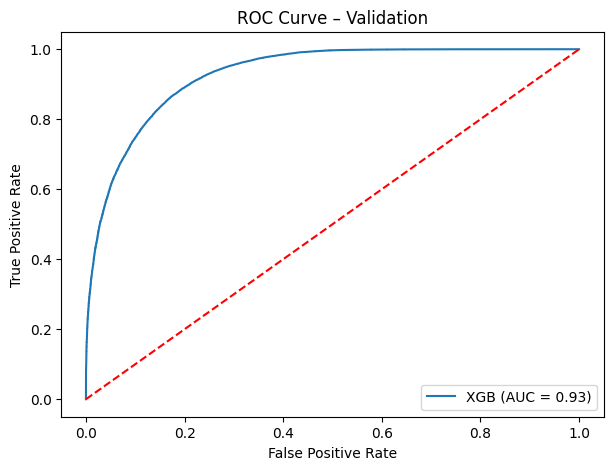

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'XGB (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Validation')
plt.legend()
plt.show()


In [43]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    min_child_weight=5,
    reg_alpha=0.5,
    reg_lambda=1.0,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)


xgb_model.fit(
    X,
    y,
    eval_set=[(X_val, y_val)],
    verbose=100
)



[0]	validation_0-auc:0.90998
[100]	validation_0-auc:0.91710
[200]	validation_0-auc:0.92030
[300]	validation_0-auc:0.92303
[400]	validation_0-auc:0.92511
[500]	validation_0-auc:0.92686
[599]	validation_0-auc:0.92840


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=-1, num_parallel_tree=None, ...)

In [44]:
test_probs = xgb_model.predict_proba(test_X_final)[:, 1]


In [47]:
submission = pd.DataFrame({
    'id': test_df.index,
    'loan_paid_back': test_probs
})

submission.to_csv('submission.csv', index=False)
submission.head()


,id,loan_paid_back
0,593994,0.942784
1,593995,0.976019
2,593996,0.402080
3,593997,0.923436
4,593998,0.969275


# Other Models

In [ ]:
models_pipeline = Pipeline(
    steps=[
        ('model', LogisticRegression())
    ]
)
param_grid = [
    {
        'model': [LogisticRegression(max_iter=100)],
        'model__penalty': ['l2'],
        'model__C': [1.0],
        'model__solver': ['lbfgs'],
        'model__class_weight': ['balanced'],
        'model__random_state': [42]
    },
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [500],
        'model__max_depth': [12],
        'model__min_samples_split': [10],
        'model__min_samples_leaf': [5],
        'model__max_features': ['sqrt'],
        'model__random_state': [42]
    },
    {
        'model': [GradientBoostingClassifier()],
        'model__n_estimators': [800],
        'model__learning_rate': [0.05],
        'model__max_depth': [4],
        'model__min_samples_split': [10],
        'model__min_samples_leaf': [5],
        'model__subsample': [0.8],
        'model__max_features': ['sqrt'],
        'model__random_state': [42]
    },
    {
        'model': [XGBClassifier(
            objective='binary:logistic',
            eval_metric='auc',
            random_state=42,
            n_jobs=-1
        )],
        'model__n_estimators': [800],
        'model__max_depth': [6],
        'model__learning_rate': [0.05],
        'model__subsample': [0.8],
        'model__colsample_bytree': [0.8]
    },
    {
        'model': [LGBMClassifier(
            objective='binary',
            random_state=42,
            n_jobs=-1
        )],
        'model__n_estimators': [800],
        'model__learning_rate': [0.05],
        'model__num_leaves': [31],
        'model__max_depth': [-1],
        'model__subsample': [0.8],
        'model__colsample_bytree': [0.8]
    }
]
grid = GridSearchCV(
    estimator=models_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Best Model: ", grid.best_estimator_.named_steps['model'])
print("Best Score: ", grid.best_score_)
print("Best Params: ", grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]
y_prob



y_pred = best_model.predict(X_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score

print(f"Model: {best_model.__class__.__name__}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"ROC AUC: {roc_auc}")

In [ ]:
test_df.iloc[56]

,594050
annual_income,76742.51
debt_to_income_ratio,0.123
credit_score,697
loan_amount,12808.73
interest_rate,15.48
gender,Male
marital_status,Single
education_level,PhD
employment_status,Employed
loan_purpose,Home


In [ ]:
test_df= pd.read_csv('/content/test.csv')
test_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1
